## Pair Programming Regresión Logística Decision Tree


In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. 

Los objetivos de este pair programming :
* Ajustad un modelo de Decision Tree a nuestros datos.
* Calculad las métricas a nuestro nuevo modelo.
* Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

### Ajustamos el modelo

In [8]:
# Cargamos nuestro dataframe
df = pd.read_pickle('../Datos/obesity_est_encoding.pkl')
df.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,1,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,1,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,1,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,1,0,0,2,0,0,1,4,5,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,1,0,0,2,0,0,2,3,6,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


In [9]:
# separamos los datos en X e y

X1 = df.drop("nivel_obesidad", axis = 1)
y1 = df["nivel_obesidad"]

In [10]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [12]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

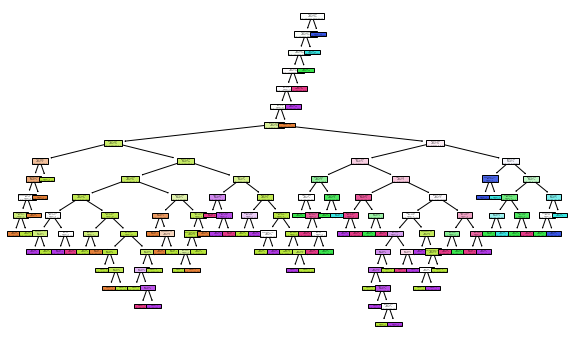

In [13]:
# Ploteamos nuestro decision tree completo
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show();

In [14]:
# Nuestras max_features son 4 o 5

max_features = np.sqrt(len(x_train1.columns))
max_features

4.123105625617661

In [15]:
# Nuestro max_depth es de 17
print(arbol.tree_.max_depth)

17


In [16]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [21]:
# Definimos una función para extraer las metricas en un dataframe
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test, average=None)
    recall_test = recall_score(clases_reales_test, clases_predichas_test, average=None)
    f1_test = f1_score(clases_reales_test, clases_predichas_test, average=None)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train, average=None)
    recall_train = recall_score(clases_reales_train, clases_predichas_train, average=None)
    f1_train = f1_score(clases_reales_train, clases_predichas_train, average=None)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df_ = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df_["modelo"] = modelo
    return df_

In [31]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree I")
dt_results1

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.955083,"[0.9642857142857143, 0.9333333333333333, 0.973...","[0.9642857142857143, 0.9032258064516129, 0.948...","[0.9642857142857143, 0.9180327868852459, 0.961...",0.947458,test,Decission Tree I
1,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,train,Decission Tree I


In [42]:
# Extraemos las métricas para cada una de nuestras categorías de la variable respuesta
d ={'result_0':{}, 'result_1':{},'result_2':{},'result_3':{},'result_4':{},'result_5':{},'result_6':{}}

for i, key in enumerate(d):
    dicc ={'accuracy':[], 'precision':[], 'recall':[], 'f1':[], 'kappa':[], 'set':[], 'modelo':[]}

    for k, v in dicc.items():
        if type(dt_results1[k][0]) != np.ndarray:
            dicc[k].append(dt_results1[k][0])
            dicc[k].append(dt_results1[k][1])
        else:
            dicc[k].append(list(dt_results1[k][0])[i])
            dicc[k].append(list(dt_results1[k][1])[i])

    dicc['categoria']=[i,i]
    d[key] = pd.DataFrame(dicc)
    

In [43]:
# Mostramos las metricas en un dataframe para cada categoría
for k,v in d.items():
    print(f'Dataframe resultado para {k}:')
    display(d[k])

Dataframe resultado para result_0:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.964286,0.964286,0.964286,0.947458,test,Decission Tree I,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,0


Dataframe resultado para result_1:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.933333,0.903226,0.918033,0.947458,test,Decission Tree I,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,1


Dataframe resultado para result_2:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.973684,0.948718,0.961039,0.947458,test,Decission Tree I,2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,2


Dataframe resultado para result_3:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.966102,0.982759,0.974359,0.947458,test,Decission Tree I,3
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,3


Dataframe resultado para result_4:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,1.0,1.0,1.0,0.947458,test,Decission Tree I,4
1,1.000000,1.0,1.0,1.0,1.000000,train,Decission Tree I,4


Dataframe resultado para result_5:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.912281,0.928571,0.920354,0.947458,test,Decission Tree I,5
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,5


Dataframe resultado para result_6:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.923077,0.96,0.941176,0.947458,test,Decission Tree I,6
1,1.000000,1.000000,1.00,1.000000,1.000000,train,Decission Tree I,6


In [44]:
resultados_totales= pd.DataFrame()
for k, dataf in d.items():
    resultados_totales = pd.concat([resultados_totales, dataf])

In [45]:
resultados_totales

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.955083,0.964286,0.964286,0.964286,0.947458,test,Decission Tree I,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,0
0,0.955083,0.933333,0.903226,0.918033,0.947458,test,Decission Tree I,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,1
0,0.955083,0.973684,0.948718,0.961039,0.947458,test,Decission Tree I,2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,2
0,0.955083,0.966102,0.982759,0.974359,0.947458,test,Decission Tree I,3
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,3
0,0.955083,1.000000,1.000000,1.000000,0.947458,test,Decission Tree I,4
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I,4


Recordemos nuestras categorías de nuestra variable respuesta:


|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

> Aunque nuestras métricas parecen realmente buenas, vamos a probar con el GridSearchCV para contrastar resultados

In [26]:
# Definimos los hiperparámetros que queremos probar y los valores que queremos

param = {"max_depth": [2,4,6,10,12,14],
        "max_features": [1,2,3,4,5],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [27]:
# Iniciamos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param, 
            cv=10,
            verbose=-1)

In [28]:
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [29]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=14, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

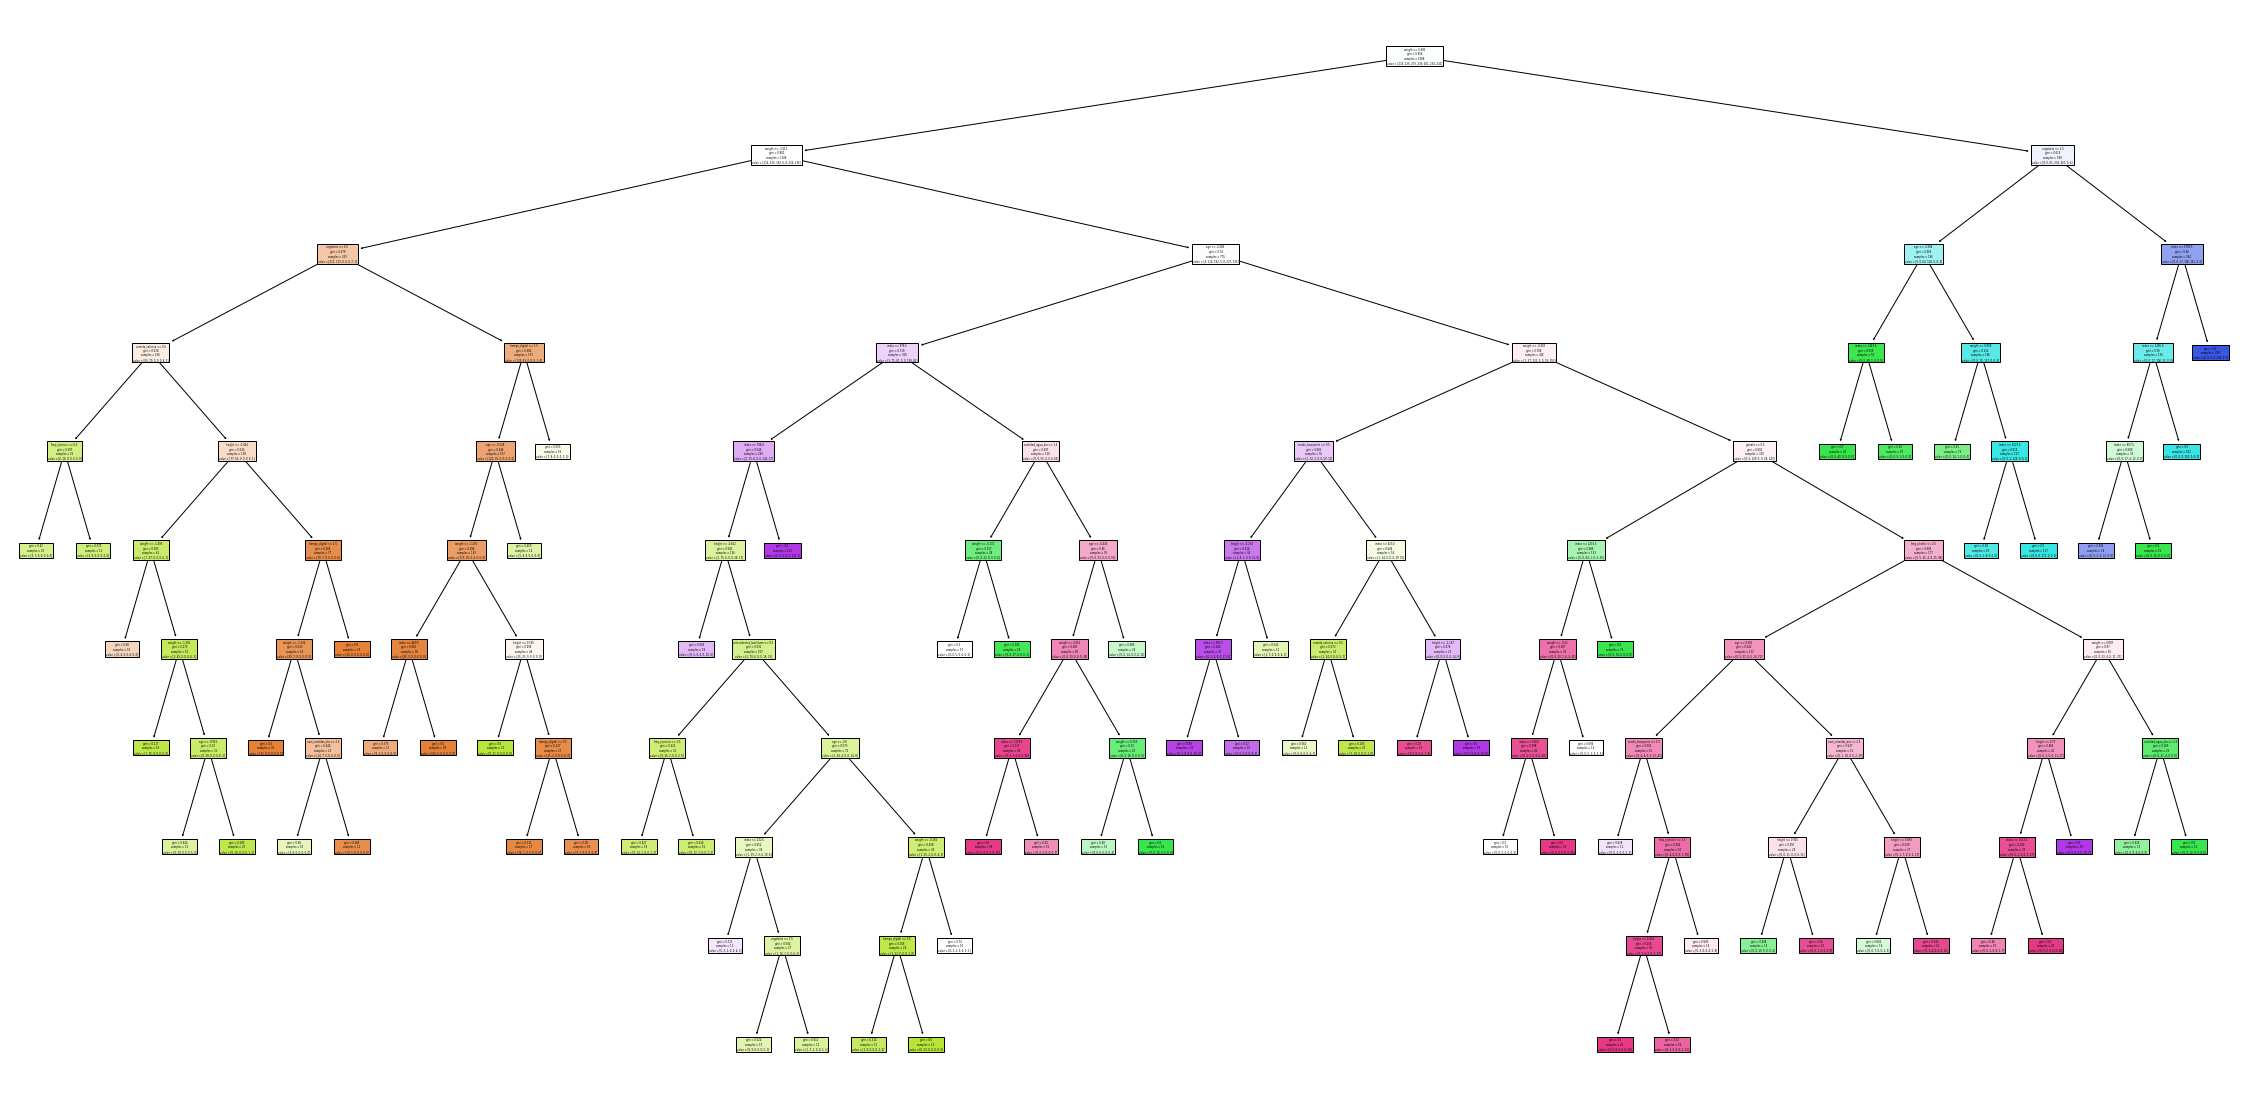

In [30]:
# Ploteamos el mejor modelo

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

In [34]:
# Hacemos las nuevas predicciones
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [35]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree II")
dt_results2

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.843972,"[0.8928571428571429, 0.6625, 0.797468354430379...","[0.8928571428571429, 0.8548387096774194, 0.807...","[0.8928571428571429, 0.7464788732394365, 0.802...",0.817159,test,Decision tree II
1,0.888033,"[0.949748743718593, 0.7362637362637363, 0.8208...","[0.875, 0.8933333333333333, 0.9230769230769231...","[0.9108433734939759, 0.8072289156626506, 0.868...",0.869190,train,Decision tree II


In [46]:
# Extraemos las métricas para cada una de nuestras categorías de la variable respuesta
d2 ={'result_0':{}, 'result_1':{},'result_2':{},'result_3':{},'result_4':{},'result_5':{},'result_6':{}}

for i, key in enumerate(d2):
    dicc2 ={'accuracy':[], 'precision':[], 'recall':[], 'f1':[], 'kappa':[], 'set':[], 'modelo':[]}

    for k, v in dicc2.items():
        if type(dt_results2[k][0]) != np.ndarray:
            dicc2[k].append(dt_results2[k][0])
            dicc2[k].append(dt_results2[k][1])
        else:
            dicc2[k].append(list(dt_results2[k][0])[i])
            dicc2[k].append(list(dt_results2[k][1])[i])

    dicc2['categoria']=[i,i]
    d2[key] = pd.DataFrame(dicc2)

In [47]:
# Mostramos las metricas en un dataframe para cada categoría
for k,v in d2.items():
    print(f'Dataframe resultado para {k}:')
    display(d2[k])

Dataframe resultado para result_0:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.892857,0.892857,0.892857,0.817159,test,Decision tree II,0
1,0.888033,0.949749,0.875000,0.910843,0.869190,train,Decision tree II,0


Dataframe resultado para result_1:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.662500,0.854839,0.746479,0.817159,test,Decision tree II,1
1,0.888033,0.736264,0.893333,0.807229,0.869190,train,Decision tree II,1


Dataframe resultado para result_2:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.797468,0.807692,0.802548,0.817159,test,Decision tree II,2
1,0.888033,0.820847,0.923077,0.868966,0.869190,train,Decision tree II,2


Dataframe resultado para result_3:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.964286,0.931034,0.947368,0.817159,test,Decision tree II,3
1,0.888033,0.995633,0.953975,0.974359,0.869190,train,Decision tree II,3


Dataframe resultado para result_4:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.969231,1.0,0.984375,0.817159,test,Decision tree II,4
1,0.888033,0.977528,1.0,0.988636,0.869190,train,Decision tree II,4


Dataframe resultado para result_5:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.833333,0.714286,0.769231,0.817159,test,Decision tree II,5
1,0.888033,0.884793,0.820513,0.851441,0.869190,train,Decision tree II,5


Dataframe resultado para result_6:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.871795,0.680000,0.764045,0.817159,test,Decision tree II,6
1,0.888033,0.897959,0.733333,0.807339,0.869190,train,Decision tree II,6


Recordemos nuestras categorías de nuestra variable respuesta:


|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

In [48]:
resultados_totales2= pd.DataFrame()
for k, dataf in d2.items():
    resultados_totales2 = pd.concat([resultados_totales2, dataf])

In [49]:
resultados_totales2

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.892857,0.892857,0.892857,0.817159,test,Decision tree II,0
1,0.888033,0.949749,0.875000,0.910843,0.869190,train,Decision tree II,0
0,0.843972,0.662500,0.854839,0.746479,0.817159,test,Decision tree II,1
1,0.888033,0.736264,0.893333,0.807229,0.869190,train,Decision tree II,1
0,0.843972,0.797468,0.807692,0.802548,0.817159,test,Decision tree II,2
1,0.888033,0.820847,0.923077,0.868966,0.869190,train,Decision tree II,2
0,0.843972,0.964286,0.931034,0.947368,0.817159,test,Decision tree II,3
1,0.888033,0.995633,0.953975,0.974359,0.869190,train,Decision tree II,3
0,0.843972,0.969231,1.000000,0.984375,0.817159,test,Decision tree II,4
1,0.888033,0.977528,1.000000,0.988636,0.869190,train,Decision tree II,4


#### No vamos a unir los resultados del primer Decision Tree porque tienen overfitting, asique vamos a compararlos con los resultados de la regresion logistica

In [54]:
# Cargamos los resultados de la regresión logística
resultados_reg_log = pd.read_csv('../Datos/resultados_reg_log.csv', index_col=0)
resultados_reg_log

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.787234,0.868852,0.946429,0.905983,0.751474,test,Regresión logistica,0
1,0.818720,0.853448,0.916667,0.883929,0.788352,train,Regresión logistica,0
0,0.787234,0.750000,0.629032,0.684211,0.751474,test,Regresión logistica,1
1,0.818720,0.730088,0.733333,0.731707,0.788352,train,Regresión logistica,1
0,0.787234,0.848485,0.717949,0.777778,0.751474,test,Regresión logistica,2
1,0.818720,0.813688,0.783883,0.798507,0.788352,train,Regresión logistica,2
0,0.787234,0.803030,0.913793,0.854839,0.751474,test,Regresión logistica,3
1,0.818720,0.873518,0.924686,0.898374,0.788352,train,Regresión logistica,3
0,0.787234,0.954545,1.000000,0.976744,0.751474,test,Regresión logistica,4
1,0.818720,0.962406,0.980843,0.971537,0.788352,train,Regresión logistica,4


In [55]:
resultados_dt_lr = pd.concat([resultados_totales2, resultados_reg_log])
resultados_dt_lr

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.843972,0.892857,0.892857,0.892857,0.817159,test,Decision tree II,0
1,0.888033,0.949749,0.875000,0.910843,0.869190,train,Decision tree II,0
0,0.843972,0.662500,0.854839,0.746479,0.817159,test,Decision tree II,1
1,0.888033,0.736264,0.893333,0.807229,0.869190,train,Decision tree II,1
0,0.843972,0.797468,0.807692,0.802548,0.817159,test,Decision tree II,2
1,0.888033,0.820847,0.923077,0.868966,0.869190,train,Decision tree II,2
0,0.843972,0.964286,0.931034,0.947368,0.817159,test,Decision tree II,3
1,0.888033,0.995633,0.953975,0.974359,0.869190,train,Decision tree II,3
0,0.843972,0.969231,1.000000,0.984375,0.817159,test,Decision tree II,4
1,0.888033,0.977528,1.000000,0.988636,0.869190,train,Decision tree II,4


In [56]:
# Vamos a añadir color para mejorar la interpretación visual
resultados_dt_lr.style.background_gradient(cmap='seismic')

KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'